# Pymaceuticals Inc.
---

### Analysis

* Summary statistics table of tumor volume for each drug regimen:
  * Since all of the mice involved in the SCC study started with tumor volumes of 45 mm3, this table showcases the particular effectiveness of two drug regimens, Capomulin and Ramicane.
    * The median tumor volumes for Capomulin and Ramicane treated mice throughout the study was between 41 and 42 mm3, which suggests that these drug regimens were effective treatments for SCC.
    * In comparison, the other eight drug regimens resulted in median tumor volumes between 50 and 54 mm3. This suggests that these drug regimens were ineffective treatments for SCC.
* Bar plot of observed timepoints for each drug regimen:
  * The SCC study took place over 45 days, so mice that reach the 45 day mark points to possible success for the drug regimen assigned to those mice.
    * Capomulin and Ramicane achieved the most number of timepoints.
    * The other eight drug regimens achieved similar numbers of timepoints, except for the drug Propriva.
      * Propriva achieved the least number of timepoints overall.
* Quartile calculations and boxplot of final tumor volumes:
  * This analysis was for four specific drug treatment regimens: Capomulin, Ceftamin, Infubinol, Ramicane
    * Capomulin and Ramicane achieved similar median final tumor volumes between 37 and 38 mm3.
    * Ceftamin and Infubinol achieved similar median final tumor volumes of 60 mm3.
    * These results provide further evidence of the effectiveness of Capomulin and Ramicane in comparison to the other drug treatments.
* Line plot of tumor volume throughout the course of study for mouse l509:
  * Mouse l509 was treated with Capomulin and this plot shows the effectiveness of Capomulin at reducing the tumor volume.
  * However, the increase in tumor volume that takes place after day 35 possibly warrants further investigation. If this Capomulin treated mouse was examined for longer than 45 days, does the tumor volume decrease or increase? However, perhaps the data for this specific mouse should not be generalized to the other Capomulin treated mice.
* Correlation and linear regression between mouse weight and average tumor volume:
  * A Pearson correlation coefficient of 0.84 indicates a positive correlation between mouse weight (g) and average tumor volume for Capomulin treated mice.
  * Furthermore, a coefficient of determination of 0.71 indicates that 71% of the variance in average tumor volume is explained by mouse weight in the linear regression model for Capomulin treated mice.

In [70]:
# Dependencies And Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# File Paths To Target CSV Files
mouse_metadata_path = 'Data/Mouse_MetaData.csv'
study_results_path = 'Data/Study_Results.csv'

# Reading Of Mouse Data & Study Result CSV Data Files, Storage In Pandas DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine Data Into Single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display DataFrame
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [71]:
# Check Number Of Mice
mouse_study['Mouse ID'].drop_duplicates().count()

249

In [72]:
# Utilize "Mouse ID" & "Timepoint" To Create DataFrame With Duplicate Data
duplicate_mouse_df = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), :]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [73]:
# Duplicate Mouse By ID Number
duplicate_mouse = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [74]:
# Duplicate Mouse "g989" Complete Data
g989_data_df = mouse_study.loc[mouse_study['Mouse ID'] == 'g989']
g989_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [75]:
# DataFrame With "g989" Complete Data Dropped
mouse_study_clean = mouse_study[mouse_study['Mouse ID'] != 'g989']
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [76]:
mouse_study_clean.info

<bound method DataFrame.info of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_m

In [77]:
# Check Number Of Mice Clean DataFrame
mouse_study_clean['Mouse ID'].drop_duplicates().count()

248

## Summary Statistics

In [78]:
# Summary Statistics Of Mean, Median, Variance, Standard Deviation, And SEM Of Tumor Volume For Each Regimen
drug_regimen_stats = mouse_study_clean.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Organize Summary Statistics Into DataFrame, Formatted Appropriately
drug_regimen_stats.columns = ['_'.join(column).strip() for column in drug_regimen_stats.columns.values]
drug_regimen_stats = drug_regimen_stats.rename(columns={
    'Tumor Volume (mm3)_mean': 'Tumor Volume Mean',
    'Tumor Volume (mm3)_median': 'Tumor Volume Median',
    'Tumor Volume (mm3)_var': 'Tumor Volume Variance',
    'Tumor Volume (mm3)_std': 'Tumor Volume Standard Deviation',
    'Tumor Volume (mm3)_sem': 'Tumor Volume Standard Error',
})

# Display DataFrame
drug_regimen_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

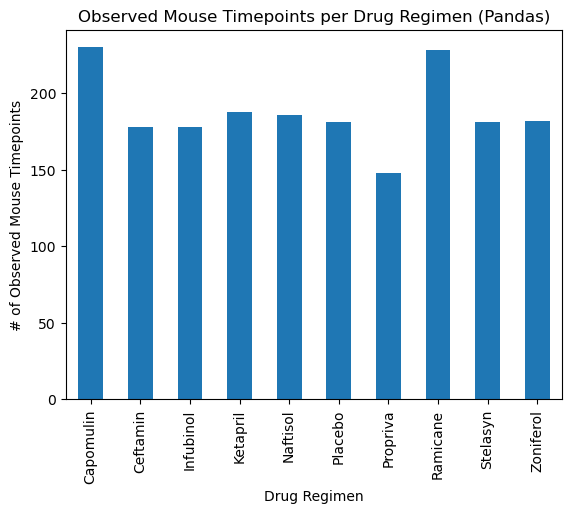

In [79]:
# Bar Plot Showing Total Number Of Rows (Mouse ID/Timepoints) For Each Drug Regimen Using Pandas
bar_pandas = pd.DataFrame(mouse_study_clean.groupby('Drug Regimen')['Timepoint']
             .count()).plot(kind='bar',
                            legend=None,
                            ylabel='# of Observed Mouse Timepoints',
                            title='Observed Mouse Timepoints per Drug Regimen (Pandas)')

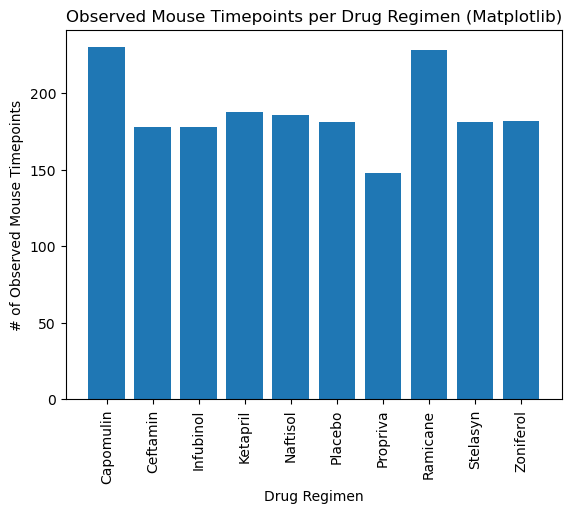

In [80]:
# Bar Plot Showing Total Number Of Rows (Mouse ID/Timepoints) For Each Drug Regimen Using Pyplot
drug_timepoint_counts = mouse_study_clean.groupby('Drug Regimen')['Timepoint'].count()
plt.bar(drug_timepoint_counts.index, drug_timepoint_counts)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Observed Mouse Timepoints per Drug Regimen (Matplotlib)')
plt.show()

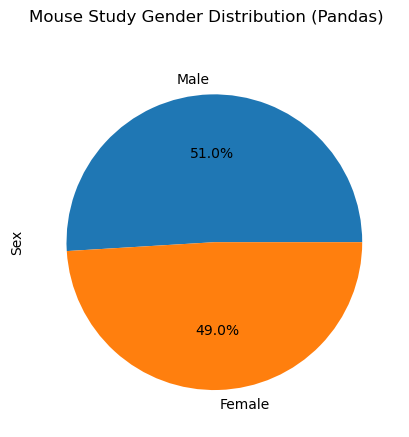

In [81]:
# Pie Plot Showing Distribution Of Female Versus Male Mice Using Pandas
pie_pandas_df = pd.DataFrame(mouse_study_clean.groupby('Sex')['Mouse ID'].count().sort_values(ascending=False))
pie_pandas = pie_pandas_df.plot(kind='pie',
                                labels=pie_pandas_df.index,
                                autopct='%1.1f%%',
                                ylabel='Sex',
                                legend=None,
                                title='Mouse Study Gender Distribution (Pandas)',
                                subplots=True)

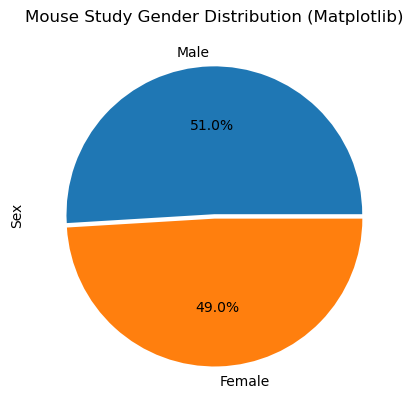

In [82]:
# Pie Plot Showing Distribution Of Female Versus Male Mice Using Pyplot
explode = (0, 0.03)
plt.pie(pie_pandas_df['Mouse ID'],
        labels=pie_pandas_df.index,
        autopct='%1.1f%%',
        explode = explode)
plt.ylabel('Sex')
plt.title('Mouse Study Gender Distribution (Matplotlib)')
plt.show()

## Quartiles, Outliers and Boxplots (Final Tumor Volume)

In [83]:
# Create DataFrame Containing Data From Four Drug Treatment Regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_study_four_treatments = mouse_study_clean.loc[
    mouse_study_clean['Drug Regimen'].isin(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])].sort_values(
        'Timepoint', ascending=True)

# Filter DataFrame To Get Tumor Volume At Last (Greatest) Timepoint
mouse_study_four_treatments.drop_duplicates(subset='Mouse ID', keep='last', inplace=True, ignore_index=True)

# Sort DataFrame "Drug Regimen" Column In Alphabetical Order, Reset Index
mouse_study_four_treatments = mouse_study_four_treatments.sort_values('Drug Regimen', ascending=True).reset_index()
mouse_study_four_treatments.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,49,s710,45,40.728578,1,Capomulin,Female,1,23
1,40,x401,45,28.484033,0,Capomulin,Female,16,15
2,33,j246,35,38.753265,1,Capomulin,Female,21,21
3,41,m601,45,28.430964,1,Capomulin,Male,22,17
4,42,v923,45,40.658124,2,Capomulin,Female,19,21


In [84]:
# Four Drug Regimens List 
four_drug_treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Loop For Each Drug In Drug Regimens List, Obtaining Quartile/Outlier Calculations
for drug in four_drug_treatments:
    drug_data = mouse_study_four_treatments[mouse_study_four_treatments['Drug Regimen'] == drug]
    drug_quartiles = drug_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lower_quartile = drug_quartiles[0.25]
    upper_quartile = drug_quartiles[0.75]
    interquartile_range = upper_quartile-lower_quartile
    lower_bound = lower_quartile-(1.5*interquartile_range)
    upper_bound = upper_quartile+(1.5*interquartile_range)
    outliers = []
    lower_bound_outliers = outliers.append(drug_data[drug_data['Tumor Volume (mm3)'] < lower_bound]['Tumor Volume (mm3)'].tolist())
    upper_bound_outliers = outliers.append(drug_data[drug_data['Tumor Volume (mm3)'] > upper_bound]['Tumor Volume (mm3)'].tolist())
    outliers_formatted = ', '.join(['[' + ', '.join('{:.2f}'.format(value) for value in sublist) + ']' for sublist in outliers])

    # Print Statements For Quartile/Outlier Calculations
    print(f'The lower quartile of Final Tumor Volume (mm3) for {drug} is: {lower_quartile: .2f}')
    print(f'The upper quartile of Final Tumor Volume (mm3) for {drug} is: {upper_quartile: .2f}')
    print(f'The interquartile range of Final Tumor Volume (mm3) for {drug} is: {interquartile_range: .2f}')
    print(f'The the median of Final Tumor Volume (mm3) for {drug} is: {drug_quartiles[0.5]: .2f}')
    print(f'Values below {lower_bound: .2f} could be outliers for {drug} Final Tumor Volume (mm3).')
    print(f'Values above {upper_bound: .2f} could be outliers for {drug} Final Tumor Volume (mm3).')
    print(f'The potential outliers for {drug} are {outliers_formatted}.')
    print(f'_____________________________________________________________________________')

The lower quartile of Final Tumor Volume (mm3) for Capomulin is:  32.38
The upper quartile of Final Tumor Volume (mm3) for Capomulin is:  40.16
The interquartile range of Final Tumor Volume (mm3) for Capomulin is:  7.78
The the median of Final Tumor Volume (mm3) for Capomulin is:  38.13
Values below  20.70 could be outliers for Capomulin Final Tumor Volume (mm3).
Values above  51.83 could be outliers for Capomulin Final Tumor Volume (mm3).
The potential outliers for Capomulin are [], [].
_____________________________________________________________________________
The lower quartile of Final Tumor Volume (mm3) for Ceftamin is:  48.72
The upper quartile of Final Tumor Volume (mm3) for Ceftamin is:  64.30
The interquartile range of Final Tumor Volume (mm3) for Ceftamin is:  15.58
The the median of Final Tumor Volume (mm3) for Ceftamin is:  59.85
Values below  25.36 could be outliers for Ceftamin Final Tumor Volume (mm3).
Values above  87.67 could be outliers for Ceftamin Final Tumor Volu

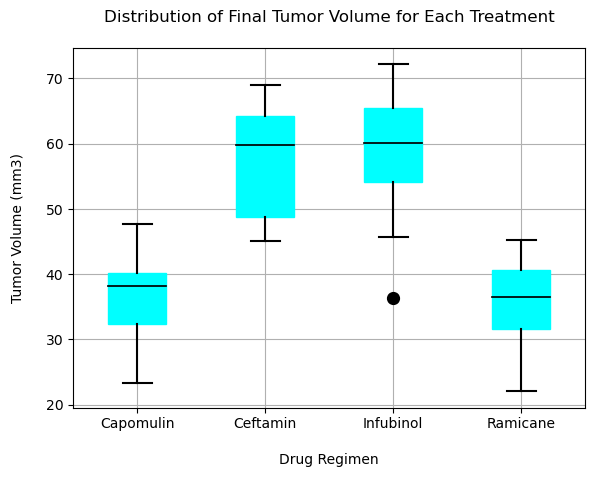

In [85]:
# Creation Of Box Plot Showing Distrubution Of Final Tumor Volume For Each Treatment Group
mouse_study_four_treatments.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen',
                                    grid=True, patch_artist=True, color='cyan',
                                    medianprops=dict(color='black', linewidth=1.25),
                                    capprops=dict(color='black', linewidth=1.5),
                                    whiskerprops=dict(color='black', linewidth=1.5),
                                    flierprops=dict(marker='o',
                                                    markersize=8,
                                                    markerfacecolor='black',
                                                    markeredgewidth=1.5,
                                                    markeredgecolor='black'))
                                                    
plt.xlabel('\nDrug Regimen')
plt.ylabel('Tumor Volume (mm3)\n')
plt.suptitle('')
plt.title('Distribution of Final Tumor Volume for Each Treatment\n')
plt.show()

## Line and Scatter Plots

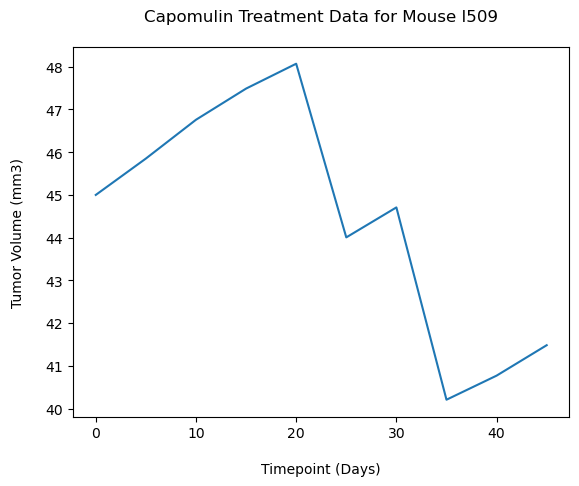

In [86]:
# DataFrame For Only Mouse 'l509'
mouse_l509 = mouse_study_clean[mouse_study_clean['Mouse ID'] == 'l509']

# Line Plot Of Tumor Volume vs. Timepoint For Mouse 'l509'
mouse_l509.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', title='Capomulin Treatment Data for Mouse l509\n', xlabel='\nTimepoint (Days)', ylabel='Tumor Volume (mm3)\n', legend=None)
plt.show()

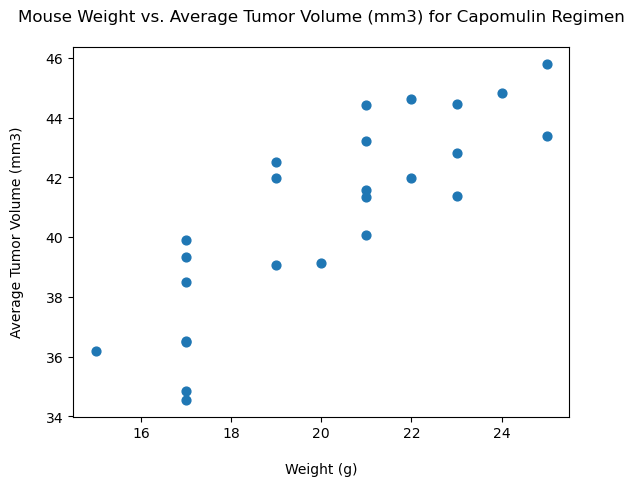

In [87]:
# Scatter Plot Of Mouse Weight vs. Average Observed Tumor Volume For Entire Capomulin Regimen
capomulin_data = mouse_study_clean[mouse_study_clean['Drug Regimen'] == 'Capomulin']
capomulin_grouped = capomulin_data.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
capomulin_grouped.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', s=40)
plt.title('Mouse Weight vs. Average Tumor Volume (mm3) for Capomulin Regimen\n')
plt.xlabel('\nWeight (g)')
plt.ylabel('Average Tumor Volume (mm3)\n')
plt.show()

## Correlation and Regression

The Pearson correlation coefficient is:  0.84
The coefficient of determination is:  0.71


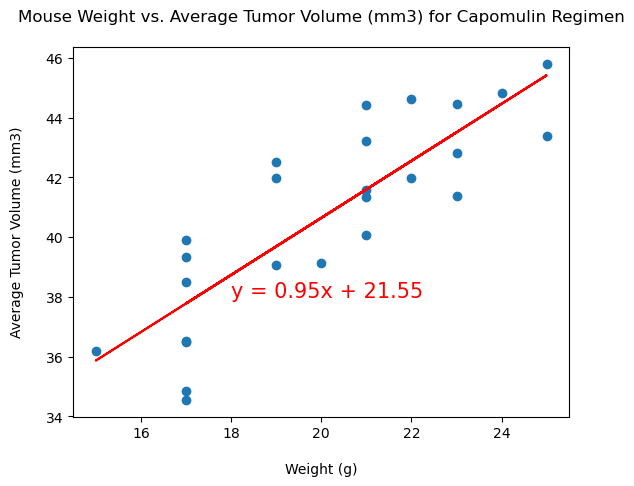

In [88]:
# Capomulin Regimen Correlation Coefficient/Linear Regression Model (Mouse Weight & Average Tumor Volume)
capomulin_weights = capomulin_grouped['Weight (g)']
capomulin_volumes = capomulin_grouped['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weights, capomulin_volumes)
regress_values = capomulin_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_weights,capomulin_volumes)
plt.plot(capomulin_weights,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.title('Mouse Weight vs. Average Tumor Volume (mm3) for Capomulin Regimen\n')
plt.xlabel('\nWeight (g)')
plt.ylabel('Average Tumor Volume (mm3)\n')
print(f"The Pearson correlation coefficient is: {rvalue: .2f}")
print(f"The coefficient of determination is: {rvalue**2: .2f}")
plt.show()